In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [7]:
data = pd.read_csv("Message_Data_Spam.csv",encoding='Latin-1')

In [8]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
data.rename(columns={"v1":"Target","v2":"Text"},inplace=True)

In [10]:
data

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
data.duplicated().sum()

403

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
data['Target'] = data['Target'].replace("ham",0)
data['Target'] = data['Target'].replace("spam",1)

In [15]:
data['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [16]:
# plt.pie(data['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
# plt.show()

In [17]:
import nltk

In [18]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
data['characters'] = data['Text'].apply(len)

In [20]:
data

,Target,Text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [21]:
data['words'] = data['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [22]:
data['sentences'] = data['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [23]:
data

,Target,Text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [24]:
data.describe()

,Target,characters,words,sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


<AxesSubplot: xlabel='characters', ylabel='Count'>

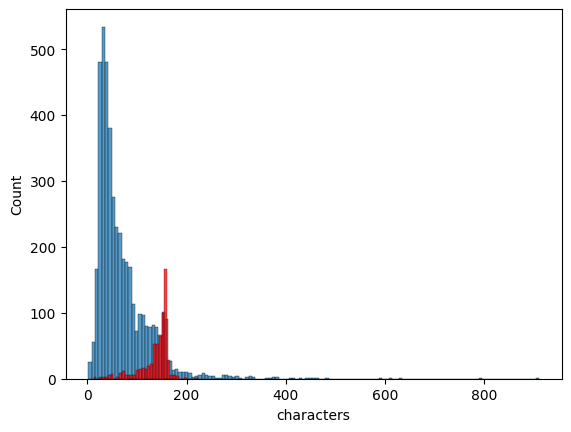

In [25]:
sns.histplot(data[data['Target']==0]['characters'])
sns.histplot(data[data['Target']==1]['characters'],color='red')

C:\Users\Mi\AppData\Local\Temp\ipykernel_4976\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

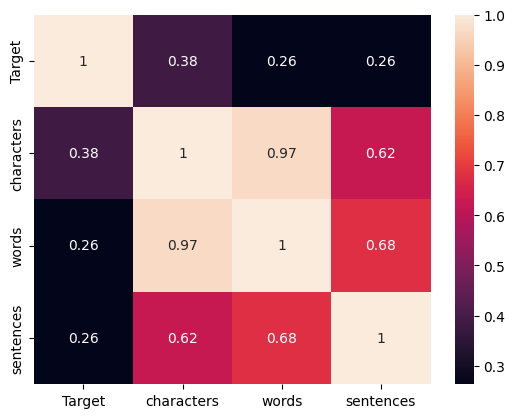

In [26]:
sns.heatmap(data.corr(),annot=True)

In [11]:

import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1]:
def Transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    L = []

    for i in text:
        if i.isalnum():
            L.append(i)
            
    text = L[:]
    L.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            L.append(i)
            
    text = L[:]
    L.clear()
    for i in text:
        L.append(ps.stem(i)) 
        
    return " ".join(L)

In [30]:
Transform_text("Hi This Is Harsh Agrawal&&&%%%  !!! Dances")

'hi harsh agraw danc'

In [31]:
data['Transformed_text'] = data['Text'].apply(Transform_text)

In [32]:
data

,Target,Text,characters,words,sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# 

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
cv = CountVectorizer()

In [35]:
x = cv.fit_transform(data['Transformed_text']).toarray()

In [36]:
x.shape

(5169, 6708)

In [37]:
y = data['Target']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=15)

In [40]:
models = {
    "LogisticReg":LogisticRegression(),
    "DecisionTree":DecisionTreeClassifier(),
    "RandomForest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "GredientBoost":GradientBoostingClassifier()
}

In [41]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(name)
    print("Accuracy Score",metrics.accuracy_score(y_test,y_pred))
    print("Precision Score",metrics.precision_score(y_test,y_pred))

LogisticReg
Accuracy Score 0.9706109822119103
Precision Score 0.9788732394366197
DecisionTree
Accuracy Score 0.9497293116782676
Precision Score 0.8562091503267973
RandomForest
Accuracy Score 0.9644238205723125
Precision Score 0.9923076923076923
AdaBoost
Accuracy Score 0.9574632637277649
Precision Score 0.9219858156028369


KeyboardInterrupt: 

In [ ]:
# sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt = 'g')

In [ ]:
# tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_pred).ravel()

In [3]:
import pickle

In [226]:
pickle.dump(cv,open("Vector.pkl",'wb'))
pickle.dump(models['RandomForest'],open("Model.pkl",'wb'))

In [318]:
pickle.dump(models['LogisticReg'],open("Model1.pkl",'wb'))

In [12]:
vector = pickle.load(open("Vector.pkl",'rb'))
model = pickle.load(open("Model.pkl",'rb'))

In [13]:
model1 = pickle.load(open("Model1.pkl",'rb'))

In [27]:
text = input()

Ffffffffff. Alright no way I can meet up with you sooner?


In [28]:
transform_text = Transform_text(text)

In [29]:
Vector_input = vector.transform([transform_text])

In [30]:
result = model.predict(Vector_input)[0]

In [31]:
if result==1:
    print("spam")
else:
    print("Not Spam")

Not Spam
